In [0]:
cd /content/drive/My Drive/Dava with ML

/content/drive/My Drive/Dava with ML


In [0]:
!unzip indian-liver-patient-records.zip

Archive:  indian-liver-patient-records.zip
  inflating: indian_liver_patient.csv  


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as m

In [0]:
ls

breast-cancer-wisconsin-data.zip  heart.ipynb
Cancer.ipynb                      indian_liver_patient.csv
chronic-kidney-disease.zip        indian-liver-patient-records.zip
data.csv                          kidney.ipynb
diabetes.csv                      liver.ipynb
Diabeties.ipynb                   new_model.csv
heart.csv                         pima-indians-diabetes-database.zip
heart-disease-uci.zip


In [0]:
dataset=pd.read_csv('indian_liver_patient.csv')
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [0]:
dataset.isnull().values.any()

True

In [0]:
dataset=dataset.dropna(axis = 0, how ='any') 


In [0]:
dataset.isnull().values.any()

False

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le=LabelEncoder()
dataset['Gender']=le.fit_transform(dataset['Gender'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
le.classes_

array(['Female', 'Male'], dtype=object)

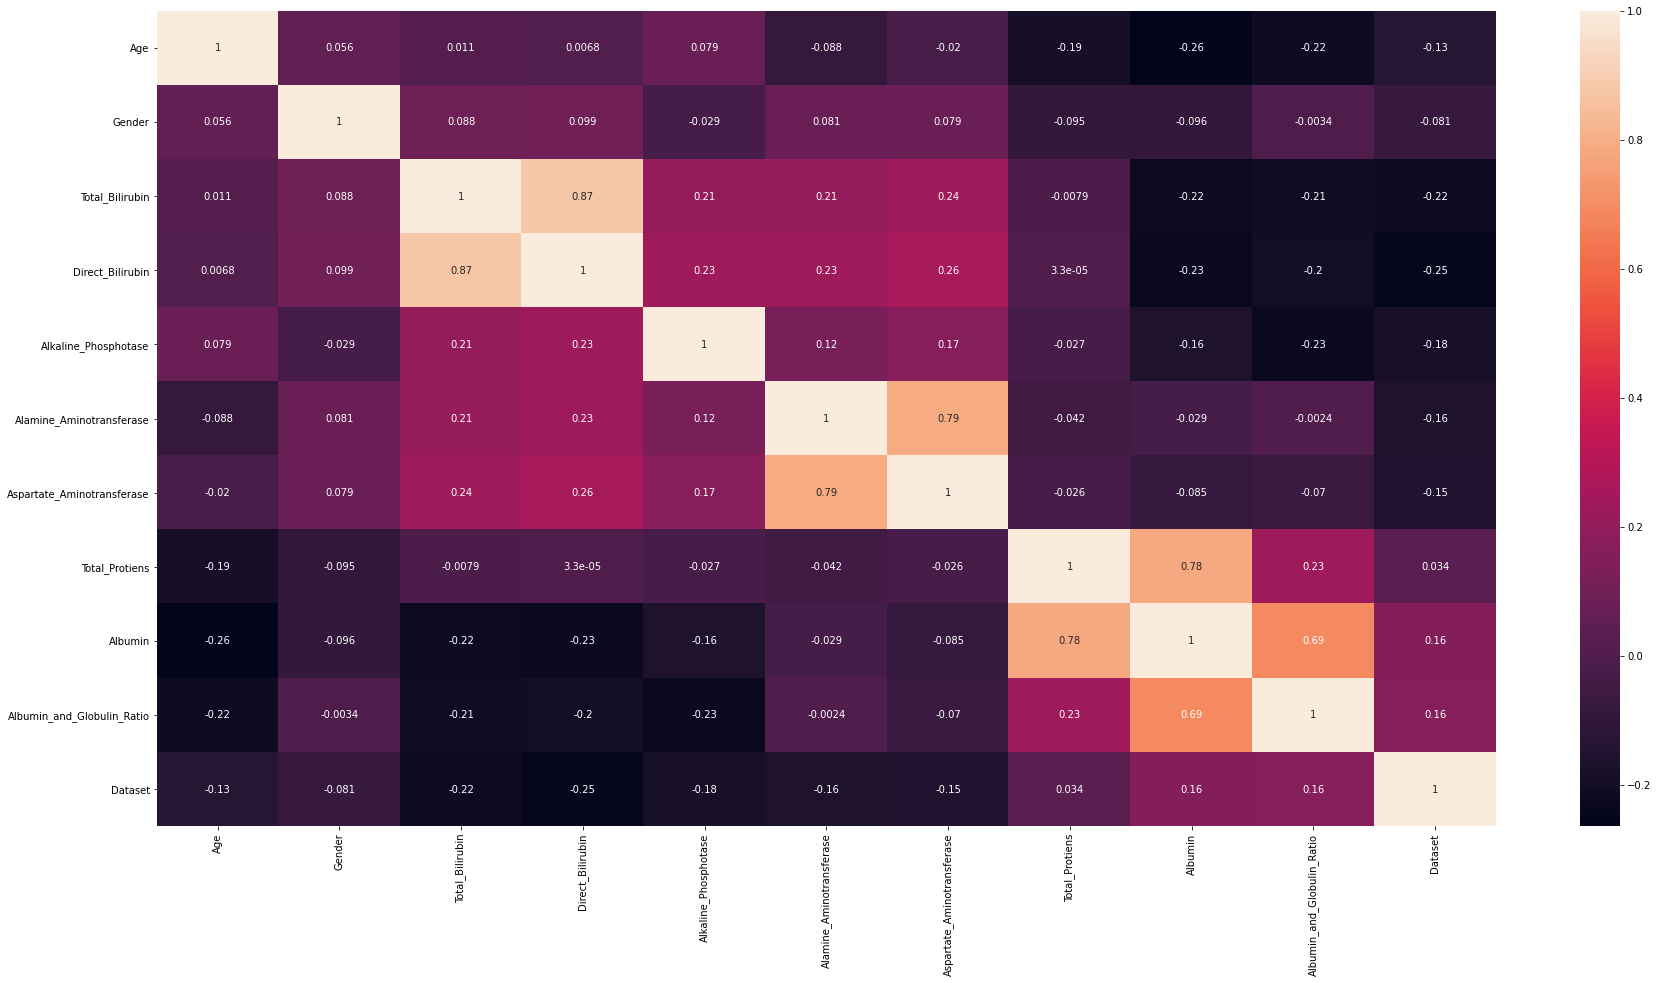

In [0]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [0]:
dataset.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [0]:
'''dataset=dataset.drop('Albumin',axis=1)'''
dataset=dataset.drop('Age',axis=1)
dataset=dataset.drop('Gender',axis=1)
'''
dataset=dataset.drop('Aspartate_Aminotransferase',axis=1)
'''

"\ndataset=dataset.drop('Aspartate_Aminotransferase',axis=1)\n"

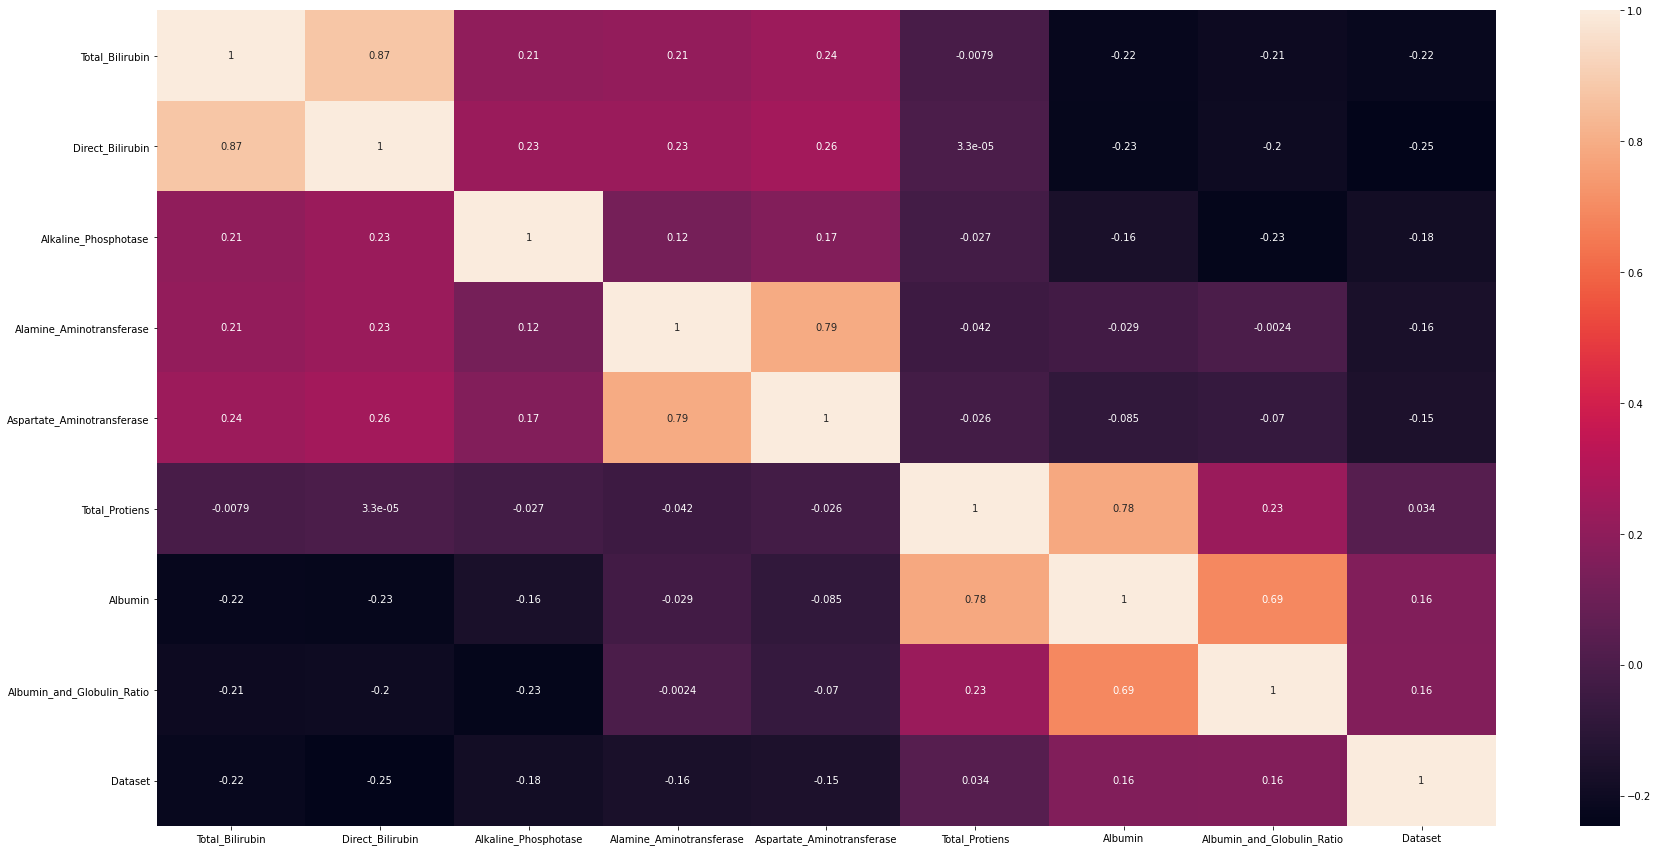

In [0]:
plt.figure(figsize=(30,15))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

##Dataset spliting

In [0]:
features=dataset.iloc[:,:-1]
labels=dataset.iloc[:,[-1]]

In [0]:
features

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,7.3,4.1,490,60,68,7.0,3.3,0.89
3,1.0,0.4,182,14,20,6.8,3.4,1.00
4,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...
578,0.5,0.1,500,20,34,5.9,1.6,0.37
579,0.6,0.1,98,35,31,6.0,3.2,1.10
580,0.8,0.2,245,48,49,6.4,3.2,1.00
581,1.3,0.5,184,29,32,6.8,3.4,1.00


In [0]:
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.3,random_state=7)

In [0]:
feature_train

,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
434,0.7,0.2,194,32,36,7.5,3.6,0.92
292,0.6,0.2,245,22,24,7.1,3.4,0.90
317,0.7,0.2,198,42,30,6.8,3.4,1.00
427,0.9,0.2,170,33,66,7.0,3.0,0.75
494,0.7,0.2,185,196,401,6.5,3.9,1.50
...,...,...,...,...,...,...,...,...
212,2.7,1.0,160,82,127,5.5,3.1,1.20
506,17.7,8.8,239,43,185,5.6,2.4,0.70
541,0.8,0.2,198,29,19,6.6,3.0,0.80
196,2.0,1.1,664,52,104,6.0,2.1,0.53


In [0]:
label_train

,Dataset
434,2
292,1
317,1
427,1
494,1
...,...
212,2
506,1
541,2
196,1


##Logistic Regression

In [0]:
model=LogisticRegression(max_iter=1000)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.7816091954022989

In [0]:
label_pred

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
label_pred

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
label_test

,Dataset
512,2
443,1
237,1
502,1
461,1
...,...
308,1
546,1
20,1
113,1


In [0]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.80      0.95      0.87       130
           2       0.65      0.30      0.41        44

    accuracy                           0.78       174
   macro avg       0.72      0.62      0.64       174
weighted avg       0.76      0.78      0.75       174



In [0]:
print(m.confusion_matrix(label_test,label_pred))

[[123   7]
 [ 31  13]]


#KNN

In [0]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':list(np.arange(1,20))}


In [0]:
model=GridSearchCV(knn,param_grid=param)
model.fit(feature_train,label_train)

In [0]:
model.best_params_

{'n_neighbors': 7}

In [0]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.6609195402298851

In [0]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.77      0.78      0.77       130
           2       0.33      0.32      0.32        44

    accuracy                           0.66       174
   macro avg       0.55      0.55      0.55       174
weighted avg       0.66      0.66      0.66       174



In [0]:
print(m.confusion_matrix(label_test,label_pred))

[[101  29]
 [ 30  14]]


In [0]:
label_pred

array([1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1])

In [0]:
label_test

,Dataset
512,2
443,1
237,1
502,1
461,1
...,...
308,1
546,1
20,1
113,1


##Decision Tree

In [0]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()
param={'max_depth':list(np.arange(1,20)),'criterion':['gini','entropy']}


In [0]:
model=GridSearchCV(dt,param_grid=param)
model.fit(feature_train,label_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [0]:
model.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [0]:
model=DecisionTreeClassifier(max_depth=1)
model.fit(feature_train,label_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.7471264367816092

In [0]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86       130
           2       0.00      0.00      0.00        44

    accuracy                           0.75       174
   macro avg       0.37      0.50      0.43       174
weighted avg       0.56      0.75      0.64       174



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print(m.confusion_matrix(label_test,label_pred))

[[130   0]
 [ 44   0]]


In [0]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
label_test

,Dataset
512,2
443,1
237,1
502,1
461,1
...,...
308,1
546,1
20,1
113,1


##SVM

In [0]:
model=SVC(kernel='linear')
model.fit(feature_train,label_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.7471264367816092

In [0]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86       130
           2       0.00      0.00      0.00        44

    accuracy                           0.75       174
   macro avg       0.37      0.50      0.43       174
weighted avg       0.56      0.75      0.64       174



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print(m.confusion_matrix(label_test,label_pred))

[[130   0]
 [ 44   0]]


In [0]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
label_test

,Dataset
512,2
443,1
237,1
502,1
461,1
...,...
308,1
546,1
20,1
113,1


##Random Forest Classifier

In [0]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param={'n_estimators':[100,200,300,400],'max_depth':list(np.arange(1,20))}


In [0]:
model=GridSearchCV(rfc,param_grid=param)
model.fit(feature_train,label_train)

In [0]:
model.best_params_

{'max_depth': 2, 'n_estimators': 400}

In [0]:
model=model.best_estimator_


In [0]:
label_pred=model.predict(feature_test)

In [0]:
m.accuracy_score(label_test,label_pred)

0.7471264367816092

In [0]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           1       0.75      1.00      0.86       130
           2       0.00      0.00      0.00        44

    accuracy                           0.75       174
   macro avg       0.37      0.50      0.43       174
weighted avg       0.56      0.75      0.64       174



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
print(m.confusion_matrix(label_test,label_pred))

[[130   0]
 [ 44   0]]


In [0]:
label_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
label_test

,Dataset
512,2
443,1
237,1
502,1
461,1
...,...
308,1
546,1
20,1
113,1
